# 3. Plotting for Exploratory data analysis (EDA)

## Data Visualization with Haberman Dataset

Haberman Dataset:https://drive.google.com/open?id=1EX9hmSzpIYlyMvy-erel4T2pRyEjq_WS&authuser=0

1.)A simple dataset to practice the basic plotting techniques.
2.)About The DataSet(Just to make things interesting)
  

   Number of Instances: 306

   Number of Attributes: 4 (including the class attribute)

Attribute Information:

   Age of patient at time of operation (numerical)
   Patient's year of operation (year - 1900, numerical)
   Number of positive axillary nodes detected (numerical)
   Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
   Missing Attribute Values: None



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#import plotly.plotly as py
#import plotly.graph_objs as go

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py

'''downlaod haberman.csv from https://drive.google.com/file/d/1EX9hmSzpIYlyMvy-erel4T2pRyEjq_WS/view'''
#Load haberman.csv into a pandas dataFrame.


haberman = pd.read_csv("D:\Rashu Studies\AppliedAICourse\Assignments\Mandatory Assignments\Mandatory Assignment 1/haberman.csv")



In [2]:
haberman.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
haberman.tail(10)

,age,year,nodes,status
296,72,67,3,1
297,73,62,0,1
298,73,68,0,1
299,74,65,3,2
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [4]:
# (Q) how many data-points and features?

print (haberman.shape)

(306, 4)


In [5]:
#(Q) What are the column names in our dataset?

print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
#(Q) How many nodes values are possible? 

#(or) Which all nodes values are possible and for a particular node value how many patinets are detected?

print(haberman["nodes"].value_counts())



#(Q)How many patients lived less than 5 years after surgery(1-denotes the patient survived 5 years or longer 2-denotes patients who died within 5 years.)

print(" 1 denotes the patient survived 5 years or longer\n 2 denotes the patient died within 5 years\n",haberman["status"].value_counts())



# balanced-dataset vs imbalanced datasets

print("dataset is imbalanced because the number of patients who lived 5 years or longer and the patients who died within 5 years is very much different")

#Haberman is completely an imbalanced data set

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64
 1 denotes the patient survived 5 years or longer
 2 denotes the patient died within 5 years
 1    225
2     81
Name: status, dtype: int64
dataset is imbalanced because the number of patients who lived 5 years or longer and the patients who died within 5 years is very much different


# (3.2) 2-D Scatter Plot

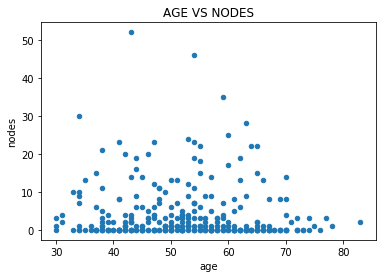

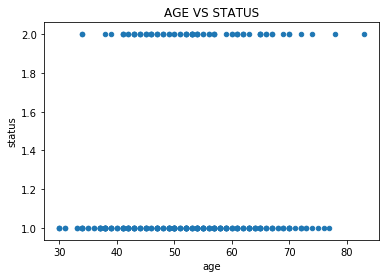

In [7]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haberman.plot(kind='scatter', x='age', y='nodes' , title = 'AGE VS NODES') ;
plt.show()

#we can see from this plot in what age do we find the patients with maximum nodes 

#like from the plot see that a person in the age group 40-45 was found with the maximum number of nodes

#we can also see thet people in the age group 70-80 are with less number of nodes also that might also be possible 

#because at that age people who lived might be less as thats a greater age.

haberman.plot(kind='scatter', x='age', y="status" , title = 'AGE VS STATUS') ;
plt.show()

#not much is clear from plotting for this in knowing how many people of which particular age group
#lived longer than 5 years or died before that after surgery.




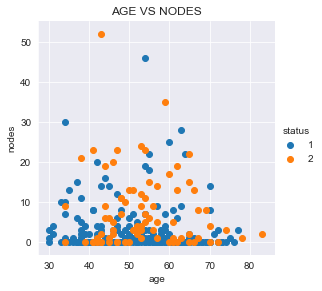

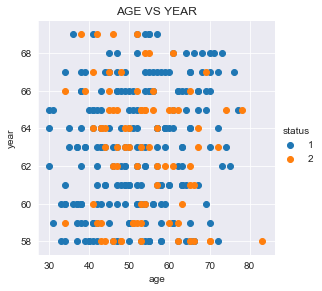

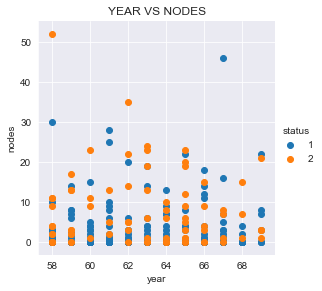

In [15]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 

sns.set_style("darkgrid");
sns.FacetGrid(haberman, hue="status", height=4).map(plt.scatter, "age", "nodes").add_legend();
plt.title("AGE VS NODES")
plt.show();

sns.set_style("darkgrid");
sns.FacetGrid(haberman, hue="status", height=4).map(plt.scatter, "age", "year").add_legend();
plt.title("AGE VS YEAR")
plt.show();

sns.set_style("darkgrid");
sns.FacetGrid(haberman, hue="status", height=4).map(plt.scatter, "year", "nodes").add_legend();
plt.title("YEAR VS NODES")
plt.show();

# I changed the size parameter to height because it has been said so in the warning that it got updated.


# notice that nothing much is attainable from the plots and we cannot even separate the two status values using any line.


# How many combinations exist?

# 3C2 = 3.3 is used because we have independent features and depending on their values we get the status value.


**Observation(s):**
1. Seperating status 1 and 2  is much harder as they have very much overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data. But we will still give it a try

What about 4-D, 5-D or n-D scatter plot?

In [24]:
# source for learning this is https://plot.ly/pandas/3d-scatter-plots/

# this plotly was asking for some account I did it using the offline feature which I read here

# https://stackoverflow.com/questions/42521772/importerror-no-module-named-plotly-plotly-in-linuxmint17-3


data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(haberman['status'].unique())):
    status = haberman['status'].unique()[i]
    color = colors[i]
    x = haberman[haberman['status'] == status ]['age']
    y = haberman[ haberman['status'] == status ]['year']
    z = haberman[ haberman['status'] == status ]['nodes']
    
    trace = dict(
        status = status,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )
    
    
layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Haberman dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)

url = py.plot(fig, filename='pandas-3d-iris.html', validate=False)

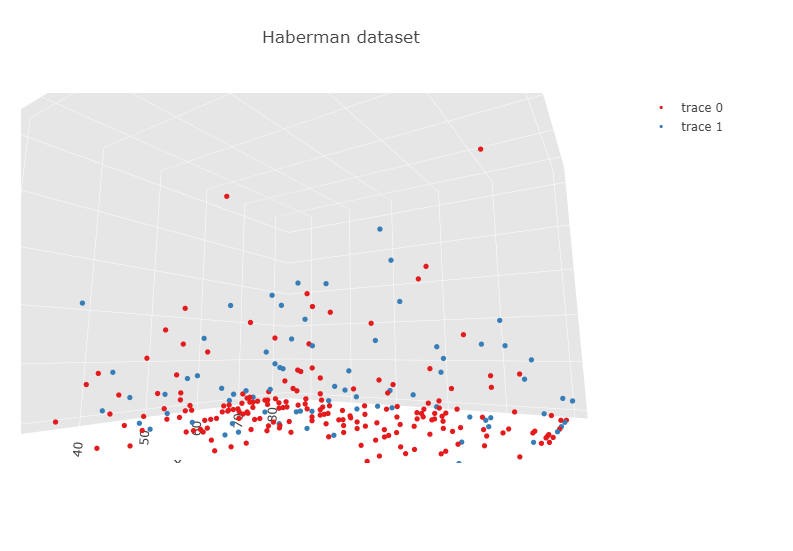

In [28]:
# From the 3d plot we saw some images like 

from IPython.display import Image
Image(filename='D:\Rashu Studies\AppliedAICourse\Assignments\Mandatory Assignments\Mandatory Assignment 1\Haberman1.png')

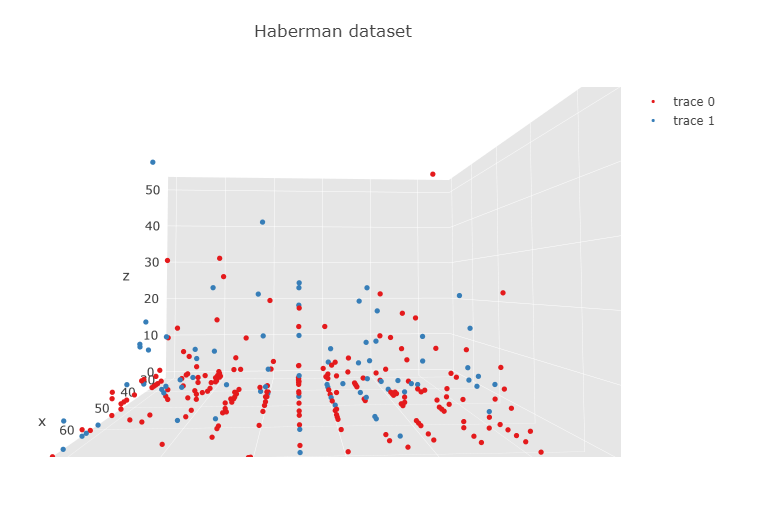

In [29]:
Image(filename='D:\Rashu Studies\AppliedAICourse\Assignments\Mandatory Assignments\Mandatory Assignment 1\Haberman2.png')



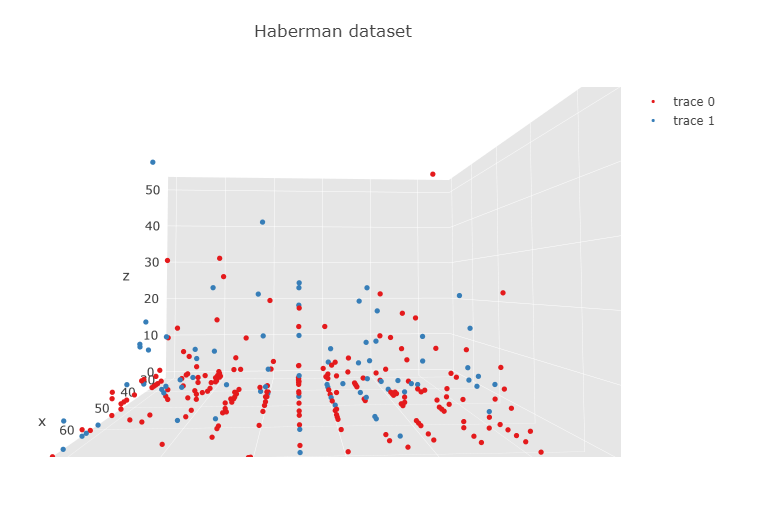

In [30]:

Image(filename='D:\Rashu Studies\AppliedAICourse\Assignments\Mandatory Assignments\Mandatory Assignment 1\Haberman2.png')


## From the above three 3d plots even on seeing the plot from different anglesd by rotating the mouse it is difficult to find a plane which can seperate the status 0 and 1 data points from each other.

## Second disadvantage here is that it requires lot of mouse movements which is in itself a very tedious task

#  (3.3) Pair-plot

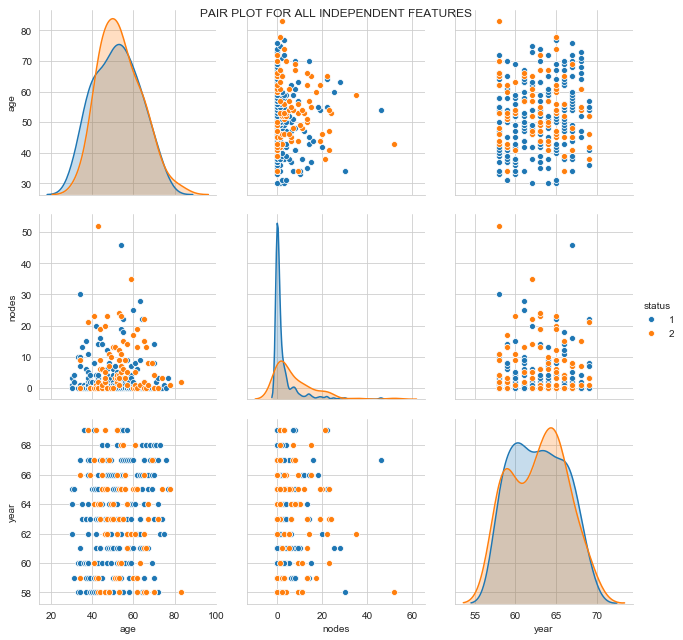

In [22]:
# pairwise scatter plot: Pair-Plot
#here we have 3 features thus 3C2 number of pair plots will be possible

# Dis-advantages: 
# Can not  be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D.
#Only possible to view 2D patterns.


plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue='status', height=3 , vars = ["age", "nodes" , "year"]);
plt.suptitle('PAIR PLOT FOR ALL INDEPENDENT FEATURES')
plt.show()


# One thing to note in pair plot is that all the diagonal elements have both x axis and y axis values as same so what do
# we get in the plot actually ? in the diagonal elements the plot we see is the pdf of that particular feature.


**Observations**
1. the data points above are very much messe up there is not  a single graph where we could seperate the blue and orange data points using a line or a simple curve 
2. It wont be possible to build the model based on simple if else conditions for seperating the two data points


# (3.4) Histogram, PDF, CDF

In [12]:
# here we are seperating the two kind of people into two seperate datasets namely haberman_survuved and haberman_not_survived 
# based on their status values

haberman_survived = haberman.loc[haberman['status'] == 1]
haberman_not_survived = haberman.loc[haberman['status'] == 2]

print(haberman_survived.head(5))

print(haberman_not_survived.head(5))

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
    age  year  nodes  status
7    34    59      0       2
8    34    66      9       2
24   38    69     21       2
34   39    66      0       2
43   41    60     23       2


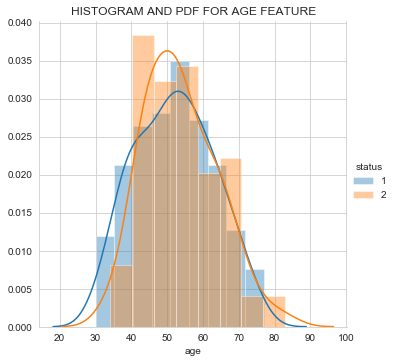

In [24]:
sns.FacetGrid(haberman, hue="status", height=5).map(sns.distplot, "age").add_legend();
plt.title("HISTOGRAM AND PDF FOR AGE FEATURE")

plt.show();



# Observations


There are lot of overlapping areas in the above case

from the above plot we can say that there is not much of difference between the number of people falling under

status 1 or status 2 based on age but still we can say that there is slight observation that people in the age between 

41 to 57 among these people who are treated slightly more number of people fell in status 2(died within 5 years of treatment)

category compared to status 1(survived after treatment for 5 years or longer) category...

We can also say that people in the age 30 to 34 are the ones who survived for 5 years or more after their treatment.

Also the people from the age group 76-84 are the ones who died within 5 years of their treatment.( and as this age group is large so it might be possible that cancer must not be the reason for their death)

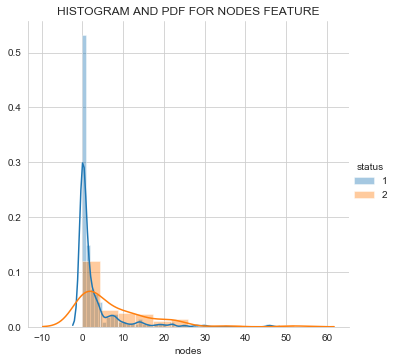

In [25]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("HISTOGRAM AND PDF FOR NODES FEATURE")
plt.show();

There is lot of overlapping in the above plot but 

from the above plot we can say that people with number of nodes lying between approximately 0 to 2

are falling highly highly highly under the category of status 1 as compared to status 2

which is a good piece of information


It means we can say that people who were found with the number of nodes as 0,1,2 (which is comparatively a very small number for the number of nodes) will live longer than 5 years after the treatment as compared to people who were found with greater number of nodes than this.

Thus the hospital can give much assurity to people who were found with number of nodes as 0,1,2 that they will surely live after 5 years of treatment also which is a good marketting parameter for the hospital.

One more thing which we can infer from the above plot is that as the number of detected nodes increased after 2 the people living after 5 years after the treatment decreased very rapidly which means that the treatment is such that it can only allow people a life of upto  5 years after treatment who had more number of nodes detected.

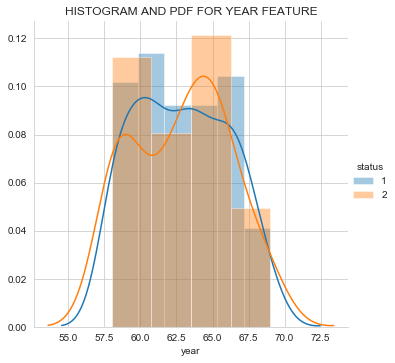

In [26]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("HISTOGRAM AND PDF FOR YEAR FEATURE")
plt.show();


There is lot of overlapping areas in the above case as well

from above plot we can say that the people who had operation in the year between 1963 to 1966 then the number of people who died within 5 years after treatment  are comparatively more than the people who lived more than 5 years after the treatment.

also from above plot we can say that the people who had operation in the year between 58 to 63 then the number of people who lived more than 5 years after treatment are comparatively more than the people who died within 5 years of their treatment

there is no as such difference anywhere else in the plot above.



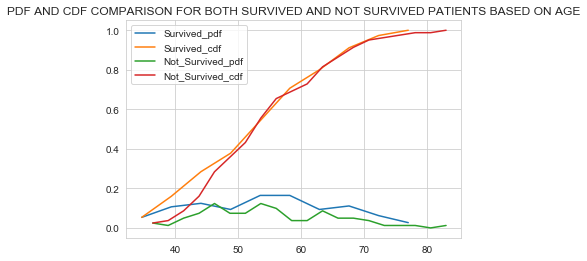

In [30]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of status 1 people  have  
# age of less than 40?


#Plot CDF of age for survived people 

counts, bin_edges = np.histogram(haberman_survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

#print(pdf);
#print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="Survived_pdf")
plt.plot(bin_edges[1:], cdf,label = "Survived_cdf" )

# Plotting pdf and cdf for people who did not survive after the treatment

counts, bin_edges = np.histogram(haberman_not_survived['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))

#print(pdf);
#print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="Not_Survived_pdf")
plt.plot(bin_edges[1:], cdf,label="Not_Survived_cdf" )

plt.title("PDF AND CDF COMPARISON FOR BOTH SURVIVED AND NOT SURVIVED PATIENTS BASED ON AGE")
plt.legend()
plt.show();


How many people with status 1 has age less than 40 can be easily seen from the cdf plot above for the survived_cdf graph line 
it shows that around approximately 20% of the people belong to that category.

As we can see that both the pdfs and both the cdfs in the above plot are very much overlaping hence age can't be the parameter 
to decide if the patient will survive or not.

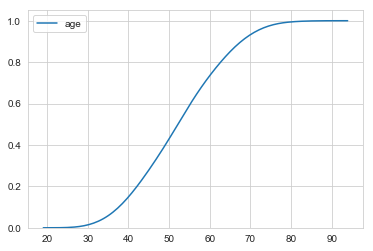

In [29]:
# another way of drawing the cdf this is a shorter way

sns.kdeplot(haberman['age'], cumulative=True)

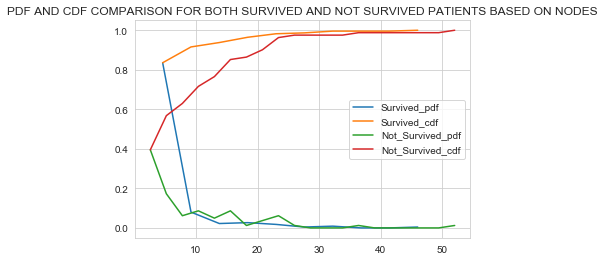

In [31]:
#  let us try the pdf and cdf plot for number of nodes feature and see if there we get something

#Plot CDF of nodes for survived people 

counts, bin_edges = np.histogram(haberman_survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

#print(pdf);
#print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="Survived_pdf")
plt.plot(bin_edges[1:], cdf,label = "Survived_cdf" )

# Plotting pdf and cdf for people who did not survive after the treatment

counts, bin_edges = np.histogram(haberman_not_survived['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))

#print(pdf);
#print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="Not_Survived_pdf")
plt.plot(bin_edges[1:], cdf,label="Not_Survived_cdf" )

plt.title("PDF AND CDF COMPARISON FOR BOTH SURVIVED AND NOT SURVIVED PATIENTS BASED ON NODES")

plt.legend()
plt.show();

for number of nodes = 6 we can say two statements 

1.) 82% of the people survived 

2.) 58% of the people not survived 

Hence,if a person with number of nodes equal to 6 is detected then if we say that he will survive then we will be 82% times correct with our statement and if we say that he wil not survive then we will be 58% times correct with our statement 

hence there are chances we can go for mis classification based on such observations.

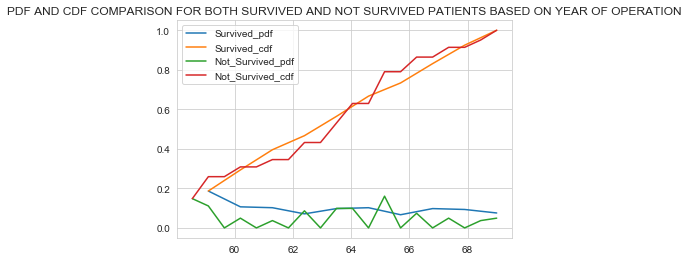

In [32]:
#  let us try the pdf and cdf plot for year of operation feature and see if there we get something

#Plot CDF of nodes for survived people 

counts, bin_edges = np.histogram(haberman_survived['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

#print(pdf);
#print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="Survived_pdf")
plt.plot(bin_edges[1:], cdf,label = "Survived_cdf" )

# Plotting pdf and cdf for people who did not survive after the treatment

counts, bin_edges = np.histogram(haberman_not_survived['year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))

#print(pdf);
#print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="Not_Survived_pdf")
plt.plot(bin_edges[1:], cdf,label="Not_Survived_cdf" )

plt.title("PDF AND CDF COMPARISON FOR BOTH SURVIVED AND NOT SURVIVED PATIENTS BASED ON YEAR OF OPERATION")

plt.legend()
plt.show();

As we can see that there is lot of overlaping here also hence not easy to seperate the two class of people based on the year in which they were operated 

# (3.5) Mean, Variance and Std-dev

In [61]:
#Mean, Variance, Std-deviation,  

print("Means:")

print(np.mean(haberman['year']))
print(np.mean(haberman['age']))
print(np.mean(haberman['nodes']))

# mean get highly affected by the outlier values 

print("\nMedian : ")
print(np.median(haberman['year']))
print(np.median(haberman['age']))
print(np.median(haberman['nodes']))

print("\nStd-dev:");

print(np.std(haberman['year']))
print(np.std(haberman['age']))
print(np.std(haberman['nodes']))





Means:
62.85294117647059
52.45751633986928
4.026143790849673

Median : 
63.0
52.0
1.0

Std-dev:
3.244090833563246
10.78578520363183
7.177896092811152


Median doesnot get affected by the outliers as that much as much mean gets affected 
we have some outlier values in the nodes feature but median maintains the middle value but mean is not able to do so

# (3.6) Median, Percentile, Quantile, IQR, MAD

In [63]:
print("\nMedian for the year: ")
print(np.median(haberman['year']))
print(np.median(haberman['age']))
print(np.median(haberman['nodes']))



print("\nQuantiles for the year:")
print(np.percentile(haberman['year'],np.arange(0, 100, 25)))
print(np.percentile(haberman['year'],np.arange(0, 100, 25)))
print(np.percentile(haberman['year'], np.arange(0, 100, 25)))

print("\n90th Percentiles for the year:")
print(np.percentile(haberman['year'],90))
print(np.percentile(haberman['year'],90))
print(np.percentile(haberman['year'], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation for the year")
print(robust.mad(haberman['year']))
print(robust.mad(haberman['year']))
print(robust.mad(haberman['year']))



Median for the year: 
63.0
52.0
1.0

Quantiles for the year:
[58.   60.   63.   65.75]
[58.   60.   63.   65.75]
[58.   60.   63.   65.75]

90th Percentiles for the year:
67.0
67.0
67.0

Median Absolute Deviation for the year
4.447806655516806
4.447806655516806
4.447806655516806


In [69]:
haberman_survived['age'].describe()

count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [70]:
haberman_not_survived['age'].describe()

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: age, dtype: float64

## mean and standard deviation from above two data for survived and not survived patients is almost same hence age doesnot play a greater role in determining whether the person will live or he will die

# (3.7) Box plot and Whiskers

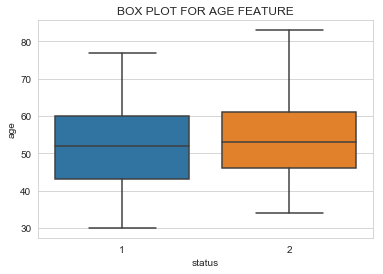

In [33]:
# width has no significance in box plots

# with respect t oage

sns.boxplot(x='status',y='age', data=haberman)
plt.title("BOX PLOT FOR AGE FEATURE")
plt.show()

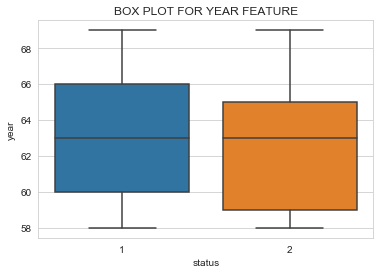

In [34]:
# with respect to year 

sns.boxplot(x='status',y='year', data=haberman)
plt.title("BOX PLOT FOR YEAR FEATURE")
plt.show()

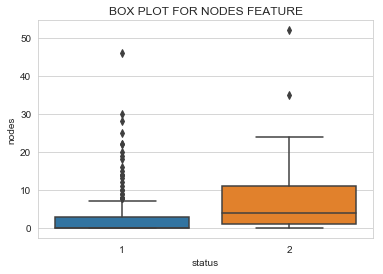

In [35]:
# with respect to nodes

sns.boxplot(x='status',y='nodes', data=haberman)
plt.title("BOX PLOT FOR NODES FEATURE")
plt.show()

The 25th 50th and 75th percentile values can be easily seen from the box plots drawn above for different features 

for none of the feature we could put a threshhold and seperate the status based on that feature 

# (3.8) Violin plots

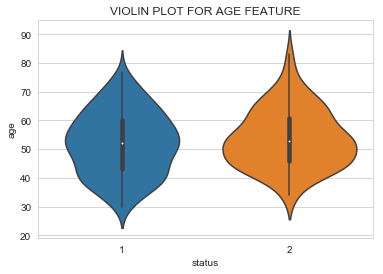

In [37]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

# with respect to age

sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.title("VIOLIN PLOT FOR AGE FEATURE")
plt.show()

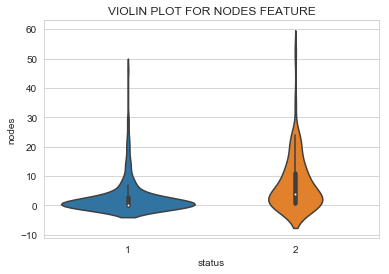

In [38]:
# with respect to number of nodes

sns.violinplot(x="status", y="nodes", data=haberman, size=8)

plt.title("VIOLIN PLOT FOR NODES FEATURE")
plt.show()

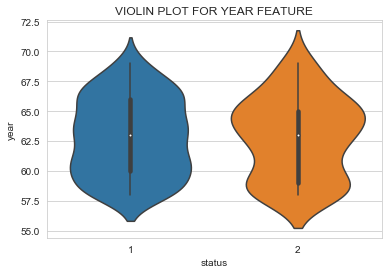

In [39]:
# with respect to year of operation 

sns.violinplot(x="status", y="year", data=haberman, size=8)

plt.title("VIOLIN PLOT FOR YEAR FEATURE")
plt.show()

## Above we did univariate and bivariate and somewhat multivariate analysis in 3d plots 

# (3.11) Multivariate probability density, contour plot.


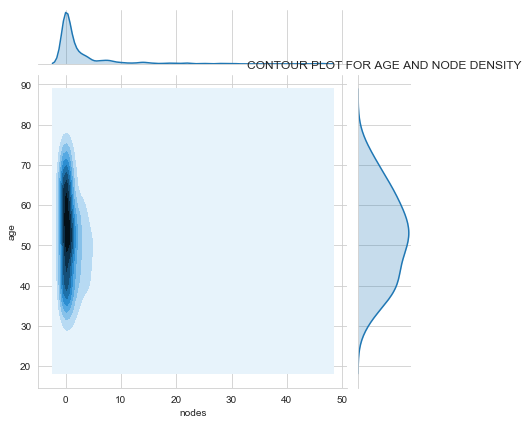

In [40]:
#2D Density plot, contors-plot
sns.jointplot(x="nodes", y="age", data=haberman_survived, kind="kde");
plt.title("CONTOUR PLOT FOR AGE AND NODE DENSITY")
plt.show();


# (3.9) Summarizing plots in english
  
  1.) Age doesnot determine if the status will be 1 or 0
  
  2.) Year of operation also doesnot determine if the status will be 0 or 1
  
  3.) Even in pair plots we saw that not even the combination of two features is able to make us reach our objective of 
      determining whether the patient will survive or not 
  
  4.) Number of nodes do determine upto some extent if the status will be 0 or 1 
      If the number of nodes are areound 5,6 or less than that then the chances that the person will survive after 5 years are       more as compared to when the number of nodes detected are more. .